# Tuning Results Evaluation

## Data Preparation

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from matplotlib import pyplot as plt

from src.eda import EDA
eda = EDA()

In [2]:
from tbparse import SummaryReader
import os

log_dir = 'tune_runs'
run_dir = os.path.join(log_dir, 'train_fashion_mnist_2023-08-18_11-44-40')

reader = SummaryReader(run_dir, pivot=True, extra_columns={'dir_name'}) # long format
df = reader.scalars
df

,step,ray/tune/done,ray/tune/iterations_since_restore,ray/tune/mean_accuracy,ray/tune/mean_val_loss,ray/tune/time_since_restore,ray/tune/time_this_iter_s,dir_name
0,1,0.0,1.0,0.674000,1.107052,30.381824,30.381824,train_fashion_mnist_da3d0_00000_0_batch_size=6...
1,2,0.0,2.0,0.744583,0.709797,49.579380,19.197556,train_fashion_mnist_da3d0_00000_0_batch_size=6...
2,3,0.0,3.0,0.780667,0.623169,74.478310,24.898928,train_fashion_mnist_da3d0_00000_0_batch_size=6...
3,4,0.0,4.0,0.792250,0.581268,98.265358,23.787050,train_fashion_mnist_da3d0_00000_0_batch_size=6...
4,5,0.0,5.0,0.801750,0.549189,120.452461,22.187101,train_fashion_mnist_da3d0_00000_0_batch_size=6...
...,...,...,...,...,...,...,...,...
230,6,0.0,6.0,0.504083,1.869219,166.244675,15.949316,train_fashion_mnist_da3d0_00019_19_batch_size=...
231,7,0.0,7.0,0.558583,1.686488,181.695251,15.450581,train_fashion_mnist_da3d0_00019_19_batch_size=...
232,8,0.0,8.0,0.642833,1.480923,196.425827,14.730574,train_fashion_mnist_da3d0_00019_19_batch_size=...
233,9,0.0,9.0,0.680917,1.292855,210.252228,13.826403,train_fashion_mnist_da3d0_00019_19_batch_size=...


In [3]:
import numpy as np
import re

def mean(x):
    return np.array(x).mean()

def get_param_from_dir_name(dirname, param):
    pattern = f'{param}=(\d+(\.\d+)?)'
    match = re.search(pattern, dirname)

    if match:
        res = float(match.group(1))
        return res
    else:
        print(f'{param} not found in the string.')

df['loss'] = df.apply(lambda x: mean(x['ray/tune/mean_val_loss']), axis=1)
df['accuracy'] = df.apply(lambda x: mean(x['ray/tune/mean_accuracy']), axis=1)
df['batch_size'] = df.apply(lambda x: get_param_from_dir_name(x['dir_name'], 'batch_size'), axis=1)
df['epochs'] = df.apply(lambda x: get_param_from_dir_name(x['dir_name'], 'epochs'), axis=1)
df['learning_rate'] = df.apply(lambda x: get_param_from_dir_name(x['dir_name'], 'learning_rate'), axis=1)

df = df[['step', 'loss', 'accuracy', 'batch_size', 'epochs', 'learning_rate', 'dir_name']]
df

,step,loss,accuracy,batch_size,epochs,learning_rate,dir_name
0,1,1.107052,0.674000,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
1,2,0.709797,0.744583,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
2,3,0.623169,0.780667,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
3,4,0.581268,0.792250,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
4,5,0.549189,0.801750,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
...,...,...,...,...,...,...,...
230,6,1.869219,0.504083,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...
231,7,1.686488,0.558583,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...
232,8,1.480923,0.642833,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...
233,9,1.292855,0.680917,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...


In [65]:
df_last = df.drop_duplicates(subset='dir_name', keep='last')
df_last

,step,loss,accuracy,batch_size,epochs,learning_rate,dir_name
9,10,0.455381,0.836500,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
19,10,1.984617,0.483417,128.0,10.0,0.0001,train_fashion_mnist_da3d0_00001_1_batch_size=1...
29,10,0.358264,0.871417,64.0,10.0,0.0070,train_fashion_mnist_da3d0_00002_2_batch_size=6...
44,15,0.600659,0.782333,32.0,15.0,0.0005,train_fashion_mnist_da3d0_00003_3_batch_size=3...
54,10,0.430293,0.846917,64.0,10.0,0.0029,train_fashion_mnist_da3d0_00004_4_batch_size=6...
69,15,1.277088,0.662917,16.0,15.0,0.0002,train_fashion_mnist_da3d0_00005_5_batch_size=1...
79,10,1.964716,0.563250,64.0,10.0,0.0001,train_fashion_mnist_da3d0_00006_6_batch_size=6...
89,10,0.723691,0.747167,16.0,10.0,0.0004,train_fashion_mnist_da3d0_00007_7_batch_size=1...
99,10,0.420568,0.848917,16.0,10.0,0.0036,train_fashion_mnist_da3d0_00008_8_batch_size=1...
104,5,2.012642,0.483417,128.0,5.0,0.0002,train_fashion_mnist_da3d0_00009_9_batch_size=1...


## Visualize Hyperparameter Realtionship

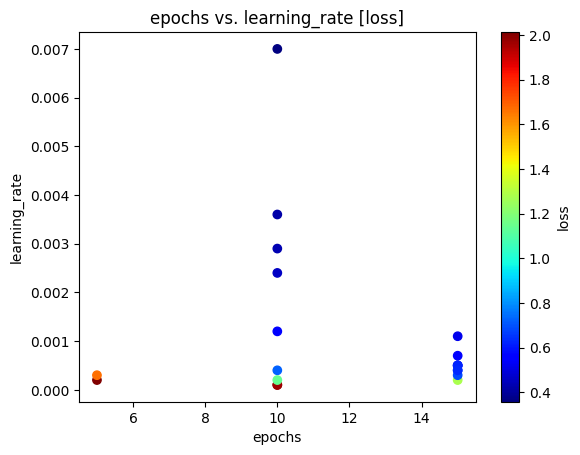

In [34]:
def plot_scatter(df, x, y, z):
    df_x = df[x]
    df_y = df[y]
    df_z = df[z]
    plt.scatter(x=df_x, y=df_y, c=df_z, cmap='jet')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs. {y} [{z}]')
    plt.colorbar(label=z)

plot_scatter(df_last, x='epochs', y='learning_rate', z='loss')

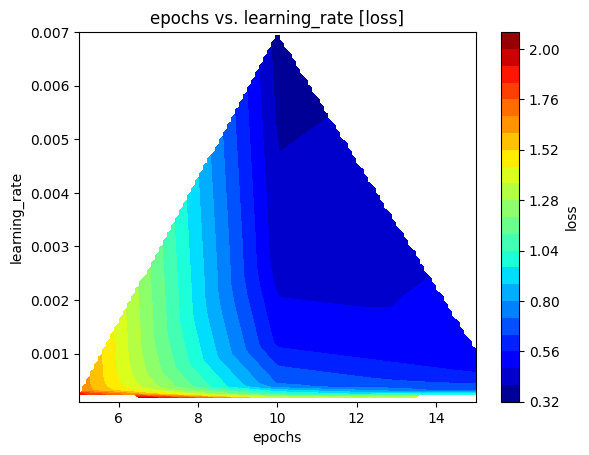

In [48]:
from scipy.interpolate import griddata

# Create a grid for interpolation
def plot_contour_interpolated(df, x, y, z):
    df_x = df[x]
    df_y = df[y]
    df_z = df[z]

    x_grid, y_grid = np.meshgrid(np.linspace(min(df_x), max(df_x), 100), np.linspace(min(df_y), max(df_y), 100))

    # Interpolate z values onto the grid
    z_grid = griddata((df_x, df_y), df_z, (x_grid, y_grid), method='linear')

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs. {y} [{z}]')
    plt.contourf(x_grid, y_grid, z_grid, levels=20, cmap='jet')
    plt.colorbar(label=z)

plot_contour_interpolated(df_last, x='epochs', y='learning_rate', z='loss')

## Visualize CNN

In [49]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

In [52]:
# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)
# dataloaders
trainloader = torch.utils.data.DataLoader(trainset)
testloader = torch.utils.data.DataLoader(testset)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [53]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x
net = FashionCNN()

In [54]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')
dataiter = iter(trainloader)
images, labels = next(dataiter)
writer.add_graph(net, images)
writer.close()

In [56]:
%load_ext tensorboard
%tensorboard --logdir runs/fashion_mnist_experiment_1

UsageError: Line magic function `%tensorboard` not found.


In [64]:
net

FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

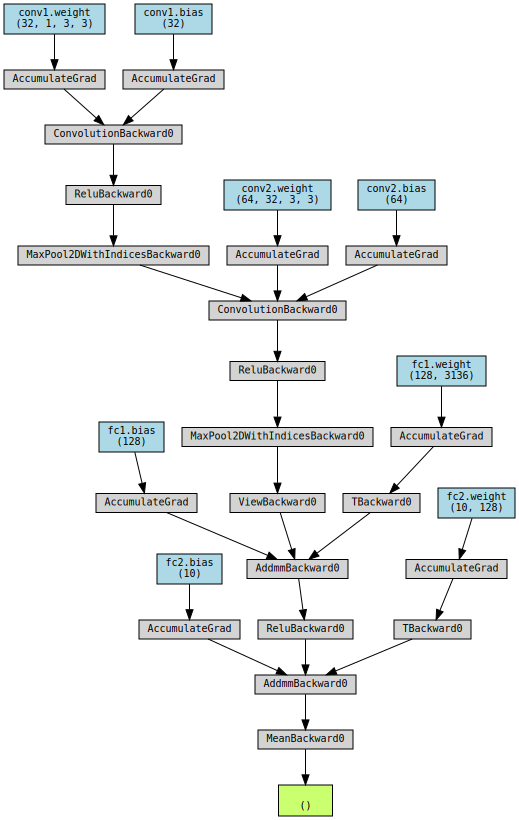

In [63]:
from torchviz import make_dot

y = net(images)
make_dot(y.mean(), params=dict(net.named_parameters()))

## Visualize Model Performance

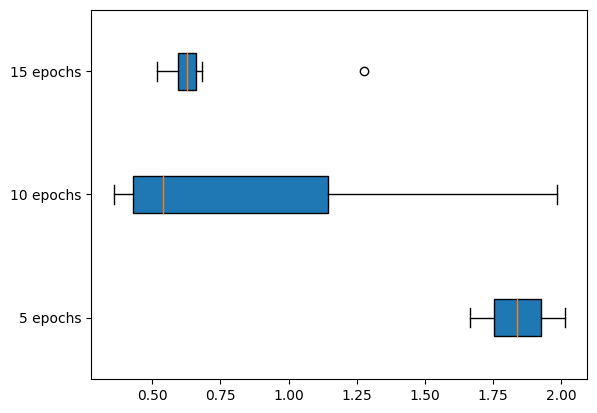

In [95]:
def plot_boxplot(labels, data):
    plt.boxplot(data, vert=False, patch_artist=True)
    plt.yticks([1, 2, 3], labels)

plot_boxplot(['5 epochs', '10 epochs', '15 epochs'], [df_last[df_last['epochs'] == 5].loss.tolist(),
              df_last[df_last['epochs'] == 10].loss.tolist(),
              df_last[df_last['epochs'] == 15].loss.tolist()])

In [ ]:
import torch.optim as optim

def train_fashion_mnist(trainloader, valloader):
    net = FashionCNN() 

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(1):  # loop over the dataset multiple times

        for i, data in enumerate(trainloader, 0):

            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return (correct / total)
    